In [1]:
#Dependencies
import json
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#Fred Key
from config import fred_api

# Prime Rate

In [2]:
#settings for Prime Rate API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MPRIME",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
}

In [3]:
#make the request
response=requests.get((base_url+request_type),params=params)
MPRIME_data=response.json()
#display the response
print(json.dumps(MPRIME_data, indent=4, sort_keys=True))

{
    "count": 54,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "2018-09-01",
    "observations": [
        {
            "date": "2018-09-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "5.03"
        },
        {
            "date": "2018-10-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "5.25"
        },
        {
            "date": "2018-11-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "5.25"
        },
        {
            "date": "2018-12-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "5.35"
        },
        {
            "date": "2019-01-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "5.50"
   

In [4]:
#get the list of observations
prime_points=MPRIME_data["observations"]

In [5]:
#process the list of observations, extracting the date and rate value
prime_date=[]
prime_rate=[]
for point in prime_points:
    prime_date.append(point["date"])
    prime_rate.append(point["value"])

In [6]:
#create DataFrames to store the Lists
#vertically oriented 
prime_virt_df=pd.DataFrame(
    {"Dates":prime_date,
    "Prime Rate":prime_rate})
prime_virt_df.set_index(["Dates"], inplace=True)
prime_virt_df

,Prime Rate
Dates,
2018-09-01,5.03
2018-10-01,5.25
2018-11-01,5.25
2018-12-01,5.35
2019-01-01,5.50
2019-02-01,5.50
2019-03-01,5.50
2019-04-01,5.50
2019-05-01,5.50


In [7]:
#horizontally oriented
prime_horz_df=pd.DataFrame([prime_rate])
prime_horz_df.columns=prime_date
prime_horz_df.index=["Prime Rate"]
prime_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
Prime Rate,5.03,5.25,5.25,5.35,5.50,5.50,5.50,5.50,5.50,5.50,...,3.94,4.38,4.85,5.50,5.73,6.25,6.95,7.27,7.50,7.74


In [8]:
#export for others to use
prime_virt_df.to_csv("prime_vertical.csv")
prime_horz_df.to_csv("prime_horizontal.csv")

# MORTGAGE30US

In [9]:
#settings for 30 year mortgage API request
base_url="https://api.stlouisfed.org/fred/"
request_type="series/observations"
params={
    "series_id":"MORTGAGE30US",
    "api_key":fred_api,
    "file_type":"json",
    "observation_start":"2018-09-01",
    "observation_end":"2023-02-01",
    "frequency":"m",
    "aggregation_method":"avg"
}

In [10]:
#make the request
response=requests.get((base_url+request_type),params=params)
M30_data=response.json()
#display the response
print(json.dumps(M30_data, indent=4, sort_keys=True))

{
    "count": 54,
    "file_type": "json",
    "limit": 100000,
    "observation_end": "2023-02-01",
    "observation_start": "2018-09-01",
    "observations": [
        {
            "date": "2018-09-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "4.63"
        },
        {
            "date": "2018-10-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "4.83"
        },
        {
            "date": "2018-11-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "4.87"
        },
        {
            "date": "2018-12-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "4.64"
        },
        {
            "date": "2019-01-01",
            "realtime_end": "2023-04-03",
            "realtime_start": "2023-04-03",
            "value": "4.46"
   

In [11]:
#get the list of observations
M30_points=M30_data["observations"]

In [12]:
#process the list of observations, extracting the date and rate value
M30_dates=[]
M30_rates=[]
for point in M30_points:
    M30_dates.append(point["date"])
    M30_rates.append(point["value"])

In [13]:
#create DataFrames to store the Lists
#vertically oriented 
M30_virt_df=pd.DataFrame(
    {"Dates":M30_dates,
    "30-Yr Mortgage Rate":M30_rates})
M30_virt_df.set_index(["Dates"], inplace=True)
M30_virt_df

,30-Yr Mortgage Rate
Dates,
2018-09-01,4.63
2018-10-01,4.83
2018-11-01,4.87
2018-12-01,4.64
2019-01-01,4.46
2019-02-01,4.37
2019-03-01,4.27
2019-04-01,4.14
2019-05-01,4.07


In [14]:
#horizontally oriented
M30_horz_df=pd.DataFrame([M30_rates])
M30_horz_df.columns=M30_dates
M30_horz_df.index=["30-Yr Mortgage Rate"]
M30_horz_df

,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,...,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01
30-Yr Mortgage Rate,4.63,4.83,4.87,4.64,4.46,4.37,4.27,4.14,4.07,3.80,...,5.23,5.52,5.41,5.22,6.11,6.90,6.81,6.36,6.27,6.26


In [15]:
#export for others to use
M30_virt_df.to_csv("M30_vertical.csv")
M30_horz_df.to_csv("M30_horizontal.csv")

# Visualization

The r-value is:0.6690170012485033


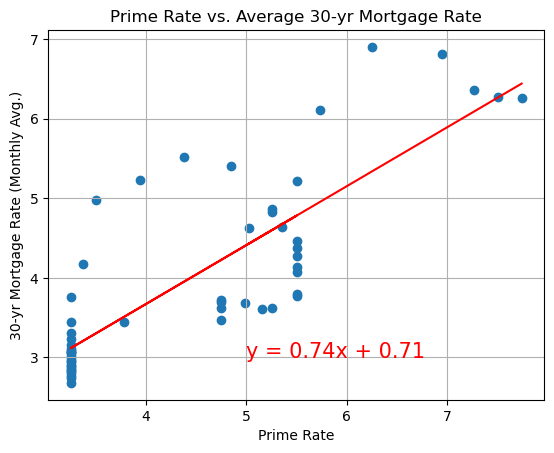

In [26]:
#convert data to float
x_raw=prime_virt_df["Prime Rate"]
x_val=x_raw.astype(float)
y_raw=M30_virt_df["30-Yr Mortgage Rate"]
y_val=y_raw.astype(float)
#plot data
plt.scatter(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
prime_m30_regress=x_val*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_val,prime_m30_regress,"r-")
plt.annotate(line_eq,(5,3),fontsize=15,color="red")
plt.xlabel("Prime Rate")
plt.ylabel("30-yr Mortgage Rate (Monthly Avg.)")
plt.grid()
plt.title("Prime Rate vs. Average 30-yr Mortgage Rate")
print(f'The r-value is:{rvalue*rvalue}')
plt.savefig("primev30yr.png")

AttributeError: 'list' object has no attribute 'type'